# Polars Practice

Polars is a Python library used for handling big data. It is similar to Pandas and Spark. Compared to Pandas, Polars is signficantly faster.

In [29]:
import polars as pl
import pandas as pd

import pyarrow
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# We are going to use this file to practice

df = pl.read_csv("practiceData/tips.csv")

df2 = pd.read_csv("practiceData/tips.csv") #using for comparison

## Basic Operations

In [3]:
df.shape # same as pandas

(244, 7)

In [4]:
df.head() #the way it returns head() looks slightly diff from pandas (includes type, adds quote marks to strings, )

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4


In [ ]:
df2.head() #our pandas dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Worth noting that we can specifiy how many rows we want to return with the <b>head()</b> functon (just like Pandas).

Additionally we can also just convert to pandas if we find the polars syntax distracting. Often, polars dataframes are converted to pandas because of how integrated pandas is with other libraries (we will showcase this later)

In [6]:
df.head(10)

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4
25.29,4.71,"""Male""","""No""","""Sun""","""Dinner""",4
8.77,2.0,"""Male""","""No""","""Sun""","""Dinner""",2
26.88,3.12,"""Male""","""No""","""Sun""","""Dinner""",4
15.04,1.96,"""Male""","""No""","""Sun""","""Dinner""",2


In [ ]:
df.head(10).to_pandas() #look at the difference in how it looks

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


## Selecting and Filtering Data

### 1. Indexing with []
No loc or iloc in Polars (like there is in Pandas)

This is usually not recommended in Polars, and so in the future we will often use speicfic functions like <b>select</b> for indexing.

In [ ]:
df[0,:] #we just want the first row

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2


In [17]:
df["sex"] #we just want the "sex" column

sex
str
"""Female"""
"""Male"""
"""Male"""
"""Male"""
"""Female"""
…
"""Male"""
"""Female"""
"""Male"""


We can also use the filter command (equivalent to loc and iloc commands in pandas).

In [ ]:
df.filter(df["total_bill"] > 50) #filter the data frame when the total bill is greater than 50

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
50.81,10.0,"""Male""","""Yes""","""Sat""","""Dinner""",3


Using the <b>pl.col</b> function call is better practice for specifying a column

In [ ]:
df.filter(pl.col("total_bill") > 50)

total_bill,tip,sex,smoker,day,time,size
f64,f64,str,str,str,str,i64
50.81,10.0,"""Male""","""Yes""","""Sat""","""Dinner""",3


### 2. Select data with idiomatic polars

In [ ]:
df.select(["sex", "smoker"])

sex,smoker
str,str
"""Female""","""No"""
"""Male""","""No"""
"""Male""","""No"""
"""Male""","""No"""
"""Female""","""No"""
…,…
"""Male""","""No"""
"""Female""","""Yes"""
"""Male""","""Yes"""


The alias function allows us to name a new column we want to make.

In [31]:
# Adding new column that calculates percent of tip

#Here we are creating a new tip percent column that takes into account 2 exisitng columns
df = df.with_columns([
    ((pl.col("tip") / pl.col("total_bill") )*100).alias("tip_percent")
]) #we have to set it equal to the data frame otherwise the change isnt actually applied to the data frame

df.head()

total_bill,tip,sex,smoker,day,time,size,tip_percent
f64,f64,str,str,str,str,i64,f64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2,5.944673
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3,16.054159
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3,16.658734
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2,13.978041
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4,14.680765


In [32]:
df.filter(pl.col("tip_percent") > 10) #returns all the time the tip percentage is greater than 10

total_bill,tip,sex,smoker,day,time,size,tip_percent
f64,f64,str,str,str,str,i64,f64
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3,16.054159
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3,16.658734
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2,13.978041
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4,14.680765
25.29,4.71,"""Male""","""No""","""Sun""","""Dinner""",4,18.623962
…,…,…,…,…,…,…,…
15.53,3.0,"""Male""","""Yes""","""Sat""","""Dinner""",2,19.31745
10.07,1.25,"""Male""","""No""","""Sat""","""Dinner""",2,12.413108
35.83,4.67,"""Female""","""No""","""Sat""","""Dinner""",3,13.033771


## Computation on the select context

In [38]:
df.select([
    pl.col("size").n_unique() #unique sizes of people at 
])

size
u32
6


In [33]:
#data frame containing metrics of our data

#lets for example work on the tip percentages

stat = df.select([
    pl.col("tip_percent").min().alias("min"),
    pl.col("tip_percent").mean().alias("mean"),
    pl.col("tip_percent").median().alias("median"),
    pl.col("tip_percent").max().alias("max"),
    pl.col("tip_percent").std().alias("std_dev")
])

#this wont mess up our original data frame

In [ ]:
df.select([pl.col("tip_percent")]).describe()

#easier way to do above

statistic,tip_percent
str,f64
"""count""",244.0
"""null_count""",0.0
"""mean""",16.080258
"""std""",6.10722
"""min""",3.563814
"""25%""",12.942192
"""50%""",15.521855
"""75%""",19.120459
"""max""",71.034483


The sample function allows us to get a sample of our data set (instead of just using head and always getting the first few lines)

In [ ]:
df.sample(10)

total_bill,tip,sex,smoker,day,time,size,tip_percent
f64,f64,str,str,str,str,i64,f64
24.52,3.48,"""Male""","""No""","""Sun""","""Dinner""",3,14.192496
20.53,4.0,"""Male""","""Yes""","""Thur""","""Lunch""",4,19.483682
8.35,1.5,"""Female""","""No""","""Thur""","""Lunch""",2,17.964072
13.94,3.06,"""Male""","""No""","""Sun""","""Dinner""",2,21.95122
17.47,3.5,"""Female""","""No""","""Thur""","""Lunch""",2,20.034345
18.71,4.0,"""Male""","""Yes""","""Thur""","""Lunch""",3,21.378942
23.95,2.55,"""Male""","""No""","""Sun""","""Dinner""",2,10.647182
7.74,1.44,"""Male""","""Yes""","""Sat""","""Dinner""",2,18.604651
48.33,9.0,"""Male""","""No""","""Sat""","""Dinner""",4,18.621974


Displaying different metrics onto a graph must be done by converting to pandas first (because of pandas better integration with other libraires)

array([[<Axes: title={'center': 'tip_percent'}>]], dtype=object)

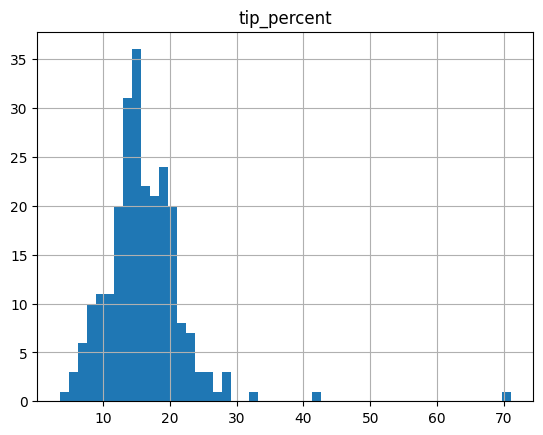

In [61]:
df.select(["tip_percent"]).to_pandas().hist(bins=50)

### Updating columns and intro to window functons

Updating a string column:

Was unable to get this to work unfortunately

In [80]:
#changing the sex column to return M and F instead of Male and Female

# df = df.with_columns([
#     pl.when(pl.col("sex") == "Female").then("F")
#     .otherwise(pl.col("sex"))
#     .alias("sex")
# ])

#Can't get this to work??


Updating a numeric column.

In [87]:
df.with_columns([
    (pl.col("tip") * 100),
    (pl.col("tip_percent") / 100)
    ]) #just multpling 2 numeric columns

total_bill,tip,sex,smoker,day,time,size,tip_percent
f64,f64,str,str,str,str,i64,f64
16.99,101.0,"""Female""","""No""","""Sun""","""Dinner""",2,0.059447
10.34,166.0,"""Male""","""No""","""Sun""","""Dinner""",3,0.160542
21.01,350.0,"""Male""","""No""","""Sun""","""Dinner""",3,0.166587
23.68,331.0,"""Male""","""No""","""Sun""","""Dinner""",2,0.13978
24.59,361.0,"""Female""","""No""","""Sun""","""Dinner""",4,0.146808
…,…,…,…,…,…,…,…
29.03,592.0,"""Male""","""No""","""Sat""","""Dinner""",3,0.203927
27.18,200.0,"""Female""","""Yes""","""Sat""","""Dinner""",2,0.073584
22.67,200.0,"""Male""","""Yes""","""Sat""","""Dinner""",2,0.088222


#### Updating values based on window function

Essentially we want to update values of a column BY a group and the new column has the same sze of the original data frame.

In [104]:
#calculating the mean tip percenrage BY gender..

df.with_columns([
    pl.col("tip_percent").mean().over("sex").alias("mean_tip_by_gender")
    ]).head()


total_bill,tip,sex,smoker,day,time,size,tip_percent,mean_tip_by_gender
f64,f64,str,str,str,str,i64,f64,f64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2,5.944673,16.649074
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3,16.054159,15.765055
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3,16.658734,15.765055
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2,13.978041,15.765055
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4,14.680765,16.649074


In [107]:
#calculating the mean tip percenrage BY size of table..

df.with_columns([
    pl.col("tip_percent").mean().over("size").alias("mean_tip_by_size")
]).head()

total_bill,tip,sex,smoker,day,time,size,tip_percent,mean_tip_by_size
f64,f64,str,str,str,str,i64,f64,f64
16.99,1.01,"""Female""","""No""","""Sun""","""Dinner""",2,5.944673,16.571919
10.34,1.66,"""Male""","""No""","""Sun""","""Dinner""",3,16.054159,15.215685
21.01,3.5,"""Male""","""No""","""Sun""","""Dinner""",3,16.658734,15.215685
23.68,3.31,"""Male""","""No""","""Sun""","""Dinner""",2,13.978041,16.571919
24.59,3.61,"""Female""","""No""","""Sun""","""Dinner""",4,14.680765,14.594901


### GROUP-BY

For this we will be working with a large data set (5 GBs) (downloaded from kaggle).

In [48]:
df = pl.read_csv("practiceData/2019-Nov.csv")

In [49]:
dfpanda = pd.read_csv("practiceData/2019-Nov.csv")

Note the difference in how long it takes to read the csv for both libraries (polars is <b>much</b> faster)

In [114]:
df.head()

event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
str,str,i64,i64,str,str,f64,i64,str
"""2019-11-01 00:00:00 UTC""","""view""",1003461,2053013555631882655,"""electronics.smartphone""","""xiaomi""",489.07,520088904,"""4d3b30da-a5e4-49df-b1a8-ba5943…"
"""2019-11-01 00:00:00 UTC""","""view""",5000088,2053013566100866035,"""appliances.sewing_machine""","""janome""",293.65,530496790,"""8e5f4f83-366c-4f70-860e-ca7417…"
"""2019-11-01 00:00:01 UTC""","""view""",17302664,2053013553853497655,null,"""creed""",28.31,561587266,"""755422e7-9040-477b-9bd2-6a6e8f…"
"""2019-11-01 00:00:01 UTC""","""view""",3601530,2053013563810775923,"""appliances.kitchen.washer""","""lg""",712.87,518085591,"""3bfb58cd-7892-48cc-8020-2f17e6…"
"""2019-11-01 00:00:01 UTC""","""view""",1004775,2053013555631882655,"""electronics.smartphone""","""xiaomi""",183.27,558856683,"""313628f1-68b8-460d-84f6-cec7a8…"


In [ ]:
df.group_by("brand").agg([
    pl.count()
]).head() #groups by the brand column and counts how mant 

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_69363/1575822256.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


brand,count
str,u32
"""colourpop""",1507
"""shoesrepublic""",325
"""promountain""",217
"""arcancilparis""",34
"""autojet""",264


In [121]:
#In pandas the operation wouldn't look too dissimilar

dfpanda.groupby("brand").agg({"brand":"count"}).head() #we specifify a column we want and name the column that counts

#faster at this than polars (why??), and why does it look like that

,brand
brand,
a-case,12647
a-derma,431
a-elita,320
a-mega,833
aardwolf,478


#### Sorting

In [ ]:
df.group_by("brand").agg([
    pl.count()
]).sort("count").reverse().head() #sorts by count and then reverses it to get it in descending order 

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_353/1434869700.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


brand,count
str,u32
null,9218235
"""samsung""",7889245
"""apple""",6259379
"""xiaomi""",4638062
"""huawei""",1410126


In [ ]:
#Computing the count and percent of instances in ONE  call

(
    df.group_by("brand").agg([
        pl.count()
    ])
    .sort("count").reverse() #original call
    .with_columns([
        (pl.col("count") / pl.col("count").sum()).alias("percent") #calcs percent
    ])
    .head(10) #gets us the top 10 results
)

#Readable and easy to use (comapred to pandas)

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_353/2802681226.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


brand,count,percent
str,u32,f64
null,9218235,0.136562
"""samsung""",7889245,0.116874
"""apple""",6259379,0.092729
"""xiaomi""",4638062,0.06871
"""huawei""",1410126,0.02089
"""lucente""",1185075,0.017556
"""lg""",1096990,0.016251
"""bosch""",975059,0.014445
"""oppo""",811698,0.012025


#### Value counts: counts unique values of a column

In [14]:
df['event_type'].value_counts()

event_type,count
str,u32
"""view""",63556110
"""purchase""",916939
"""cart""",3028930


Note that we can also calculate that by doing a groupby call on the event_type column and using pl.count in the aggregate function, like so:

In [ ]:
df.group_by('event_type').agg(pl.count())

#note that though more verbose it runs quicker (why??)

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_353/683521352.py:1: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  df.group_by('event_type').agg(pl.count())


event_type,count
str,u32
"""cart""",3028930
"""purchase""",916939
"""view""",63556110


#### Group-by with 2 more or groups

In [24]:
df_brand_event = df.group_by(["brand", "event_type"]).agg([
    pl.count()
]) # made a new data frame that groups by 2 specific features and co

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_353/611383338.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count()


In [26]:
df_brand_event.head()

brand,event_type,count
str,str,u32
"""orivel""","""purchase""",1
"""sunday""","""purchase""",2
"""farroad""","""cart""",926
"""caramelia""","""view""",16847
"""sospiro""","""view""",291


Now.. what if we want the event type to be the column, so our table is easier to read

We would use the pivot function to reshape our dataframe, this is useful if our table isn't showing exactly what we want it to show or not doing so clearly.

In [27]:
df_brand_event_wide = df_brand_event.pivot(values="count",
                                            index=["brand"],
                                            columns=["event_type"])

df_brand_event_wide.head()

/var/folders/3m/17tpc1t17f75wznjzr3gj22w0000gn/T/ipykernel_353/2172040839.py:1: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_brand_event_wide = df_brand_event.pivot(values="count",


brand,purchase,cart,view
str,u32,u32,u32
"""orivel""",1,1,105
"""sunday""",2,13,1031
"""farroad""",236,926,13415
"""caramelia""",117,325,16847
"""sospiro""",1,4,291


Now we can read this table better and be able to draw more conclusions (are certain brands purchased more compared to how much they're viewed, etc).